In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('place.csv')

df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


 Steps

 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
df2 = df.iloc[:,1:]

df2.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
import matplotlib.pyplot as plt

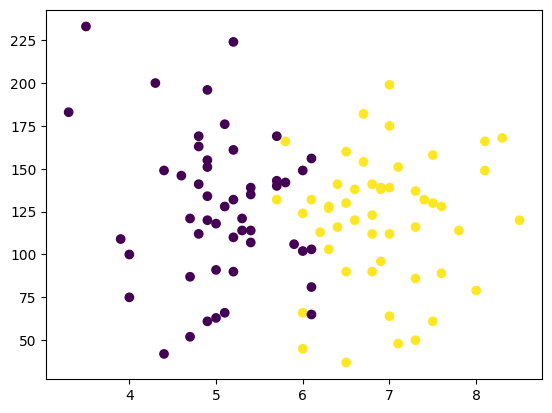

In [6]:
plt.scatter(
    df2['cgpa'],
    df2['iq'],
    c = df2['placement']
)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df2.iloc[:,0:2]

X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [9]:
y = df2.iloc[:,-1]

y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [10]:
x_train,x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
x_train

,cgpa,iq
23,4.7,87.0
5,7.1,48.0
29,7.0,112.0
42,7.6,89.0
44,7.5,61.0
...,...,...
25,5.0,91.0
73,4.9,61.0
71,6.1,132.0
34,4.8,163.0


In [12]:
y_train

23    0
5     1
29    1
42    1
44    1
     ..
25    0
73    0
71    1
34    0
41    0
Name: placement, Length: 80, dtype: int64

In [13]:
x_test

,cgpa,iq
21,7.1,151.0
60,6.9,139.0
35,6.8,90.0
3,7.4,132.0
12,5.4,139.0
22,4.9,120.0
33,6.0,149.0
57,6.5,130.0
28,5.2,90.0
36,5.7,140.0


In [14]:
y_test

21    1
60    1
35    1
3     1
12    0
22    0
33    0
57    1
28    0
36    0
84    0
26    1
96    0
76    0
16    0
87    1
45    1
49    0
20    1
70    1
Name: placement, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()

In [17]:
x_train = scalar.fit_transform(x_train)

x_train

array([[-1.07996370e+00, -8.72729241e-01],
       [ 9.13815442e-01, -1.86324042e+00],
       [ 8.30741310e-01, -2.37786177e-01],
       [ 1.32918610e+00, -8.21933796e-01],
       [ 1.24611197e+00, -1.53307003e+00],
       [-7.47667179e-01, -1.40608141e+00],
       [ 8.30741310e-02, -1.43147914e+00],
       [ 7.37846504e-16,  6.69864932e-02],
       [-6.64593048e-01, -2.88581623e-01],
       [ 1.66148262e-01, -2.12388455e-01],
       [-8.30741310e-01, -8.53998421e-02],
       [-1.66148262e+00, -1.17750191e+00],
       [ 1.07996370e+00, -1.36195287e-01],
       [ 1.07996370e+00,  3.97156886e-01],
       [ 4.15370655e-01, -7.96536074e-01],
       [-4.98444786e-01, -3.64774790e-01],
       [ 8.30741310e-01, -1.45687686e+00],
       [-1.66148262e-01,  5.24145499e-01],
       [-1.66148262e+00, -5.42558848e-01],
       [ 1.49533436e+00, -1.86990732e-01],
       [ 1.32918610e+00,  1.68577383e-01],
       [-1.41226023e+00,  1.99721341e+00],
       [-7.47667179e-01,  1.38766807e+00],
       [-2.

In [18]:
x_test = scalar.transform( x_test )

x_test

array([[ 9.13815442e-01,  7.52725002e-01],
       [ 7.47667179e-01,  4.47952332e-01],
       [ 6.64593048e-01, -7.96536074e-01],
       [ 1.16303783e+00,  2.70168274e-01],
       [-4.98444786e-01,  4.47952332e-01],
       [-9.13815442e-01, -3.46043970e-02],
       [ 7.37846504e-16,  7.01929557e-01],
       [ 4.15370655e-01,  2.19372829e-01],
       [-6.64593048e-01, -7.96536074e-01],
       [-2.49222393e-01,  4.73350054e-01],
       [-2.49222393e-01,  1.20988401e+00],
       [ 8.30741310e-01,  1.97181568e+00],
       [-1.32918610e+00, -2.01562676e+00],
       [-9.13815442e-01,  8.54315892e-01],
       [-6.64593048e-01,  2.60675875e+00],
       [-2.49222393e-01,  2.70168274e-01],
       [ 7.37846504e-16, -1.40608141e+00],
       [-4.98444786e-01,  3.46361441e-01],
       [ 4.98444786e-01, -3.46043970e-02],
       [ 2.49222393e-01,  1.43179661e-01]])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

model

LogisticRegression()

In [21]:
model.fit( x_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict( x_test)

y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score( y_test, y_pred)

0.85

In [25]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

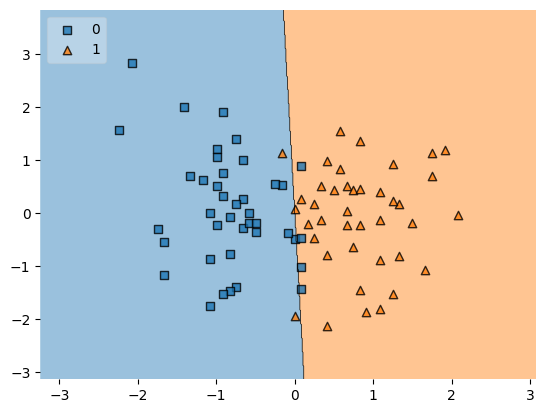

In [26]:
plot_decision_regions( x_train , y_train.values, clf=model, legend=2 )

In [27]:
import pickle

In [29]:
pickle.dump( model, open('model.pkl', 'wb'))